In [3]:
# package management

import streamlit as st
import pandas as pd
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [4]:
path = 'test_image2.png'

In [64]:
def process_PSLA(path):
    
	img_org= cv2.imread(path)
	img = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
	# perform edge detection, then perform a dilation + erosaion to 
	#close gaps in between object edges
	# edged = cv2.Canny(img,50,100)
	# edged = cv2.dilate(edged, None, iteration = 1)
	# edged = cv2.erode(edged, None, iteration = 1)
 
	imginv = 255-img
	dst = cv2.fastNlMeansDenoisingColored(img_org,None,10,10,7,21)
 
 	# lower part of LVID
	ret1,thresh1 = cv2.threshold(img,25,255,cv2.THRESH_BINARY)
	mask_rec = np.ones(thresh1.shape[:2], dtype="uint8") * 255
	cv2.rectangle(mask_rec, (0,0),(thresh1.shape[:2][1],250),0,-1)

	masked = cv2.bitwise_and(thresh1,thresh1,mask= mask_rec)
	#print(masked)
	#lt.imshow(masked, cmap="gray")
	#implot1 = plt.imshow(255-thresh1, cmap='gray')
	plt.imsave('./res/medium.png', masked, cmap = 'gray')
 
	# higher part of LVID
	ret2,thresh2 = cv2.threshold(img,8,255,cv2.THRESH_BINARY)
	contours, hierarchy  = cv2.findContours(thresh2,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)      
	contours = sorted(contours, key=cv2.contourArea)
	counter = 0
	# check for area of each contour and only save with the biggest one
	for c in contours:
		area = cv2.contourArea(c)
		if (area > 10000):
			counter+=1
	l = [-x for x in range(1,counter+1)]
	countors_req = [contours[i] for i in l]
	mask1 = np.ones(thresh1.shape[:2], dtype="uint8") * 255
	cv2.fillPoly(mask1, pts = countors_req, color=(0,0,0))
	#implot = plt.imshow(255-mask1, cmap='gray')
	#implot2 = plt.imshow(255-thresh2, cmap='gray')
	plt.imsave('./res/higher.png', 255-mask1, cmap = 'gray')
 

	# measure for LVPW
	ret3,thresh3 = cv2.threshold(img,60,255,cv2.THRESH_BINARY)
	#implot3 = plt.imshow(thresh3, cmap='gray')
	contours, hierarchy  = cv2.findContours(thresh3,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)            
	contours = sorted(contours, key=cv2.contourArea)            
	mask2 = np.ones(thresh1.shape[:2], dtype="uint8") * 255
	cv2.drawContours(mask2, contours[-1], -1, 0, -1)
	cv2.fillPoly(mask2, pts =[contours[-1]], color=(0,0,0))
	#img4 = cv2.bitwise_and(thresh3, img, mask=mask2)
	#implot = plt.imshow(255-mask2, cmap='gray')
	plt.imsave('./res/lower.png', mask2, cmap = 'gray')
        

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


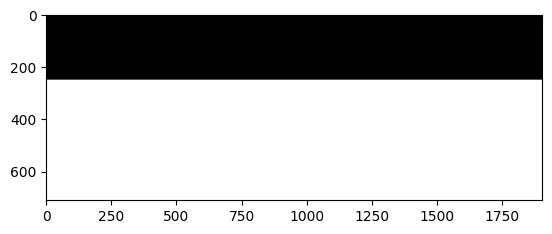

In [65]:
process_PSLA('test_image2.png')